## <font color='#e89c9a'><ul><li>Correlation Heatmap</li></ul></font>

In [ ]:
relation_dataset = preprocessed_dataset.copy()
relation_dataset = relation_dataset.drop(columns=['customerID'])

In [ ]:
plt.figure(figsize=(30, 20))
correlation_matrix = relation_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, annot_kws={"size": 18, "weight": "bold"})
plt.gca().set_facecolor("none")
plt.gcf().set_facecolor("none")
plt.xticks(fontsize=12)
plt.yticks(fontsize=16, rotation=0, wrap=True)
plt.show()

### <font color='#9ae89c'><ul style="list-style-type:circle;"><li>Label Encoding</li></ul></font>

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()

def label_encode(attr_name):
  preprocessed_dataset[attr_name] = labelEncoder.fit_transform(preprocessed_dataset[attr_name])
  label_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

  return pd.DataFrame(list(label_mapping.items()), columns=['Category', 'Encoded Value'])

In [ ]:
label_encode('gender')

,Category,Encoded Value
0,Female,0
1,Male,1


In [ ]:
label_encode('Partner')

,Category,Encoded Value
0,No,0
1,Yes,1


In [ ]:
label_encode('Dependents')

,Category,Encoded Value
0,No,0
1,Yes,1


In [ ]:
label_encode('PhoneService')

,Category,Encoded Value
0,No,0
1,Yes,1


In [ ]:
label_encode('PaperlessBilling')

,Category,Encoded Value
0,No,0
1,Yes,1


In [ ]:
preprocessed_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880 entries, 0 to 5879
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5880 non-null   int64  
 1   SeniorCitizen     5880 non-null   int64  
 2   Partner           5880 non-null   int64  
 3   Dependents        5880 non-null   int64  
 4   tenure            5880 non-null   int64  
 5   PhoneService      5880 non-null   int64  
 6   MultipleLines     5880 non-null   object 
 7   InternetService   5880 non-null   object 
 8   OnlineSecurity    5880 non-null   object 
 9   OnlineBackup      5880 non-null   object 
 10  DeviceProtection  5880 non-null   object 
 11  TechSupport       5880 non-null   object 
 12  StreamingTV       5880 non-null   object 
 13  StreamingMovies   5880 non-null   object 
 14  Contract          5880 non-null   object 
 15  PaperlessBilling  5880 non-null   int64  
 16  PaymentMethod     5880 non-null   object 


## <font color='#e89c9a'><ul><li>With PCA</li></ul></font>

In [ ]:


pca = PCA(n_components=5, random_state=42) 
x_pca = pca.fit_transform(x)

In [ ]:
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca, y, test_size=0.3, random_state=42)
pd.DataFrame({
	'Train': [sum(y_pca_train), len(y_pca_train) - sum(y_pca_train), y_pca_train.shape[0]],
	'Test': [sum(y_pca_test), len(y_pca_test) - sum(y_pca_test), y_pca_test.shape[0]],
}, index=['Churn', 'Non-Churn', 'Total'])

,Train,Test
Churn,2008,890
Non-Churn,2108,874
Total,4116,1764


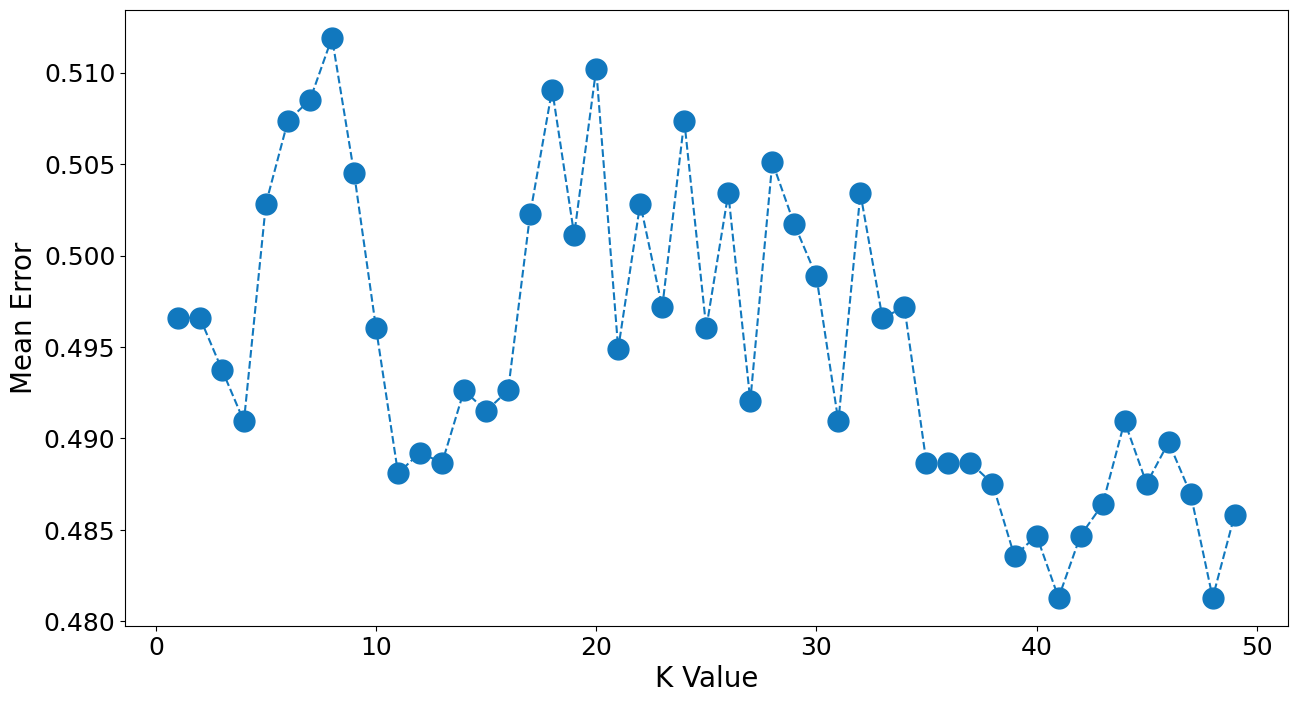

,K Value,Mean Error
Min,41,0.481
Max,8,0.512


In [ ]:
plot_error_rate(x_pca_train, y_pca_train, x_pca_test, y_pca_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=41, weights='distance')
knn_model.fit(x_pca_train, y_pca_train)

KNeighborsClassifier(n_neighbors=41, weights='distance')

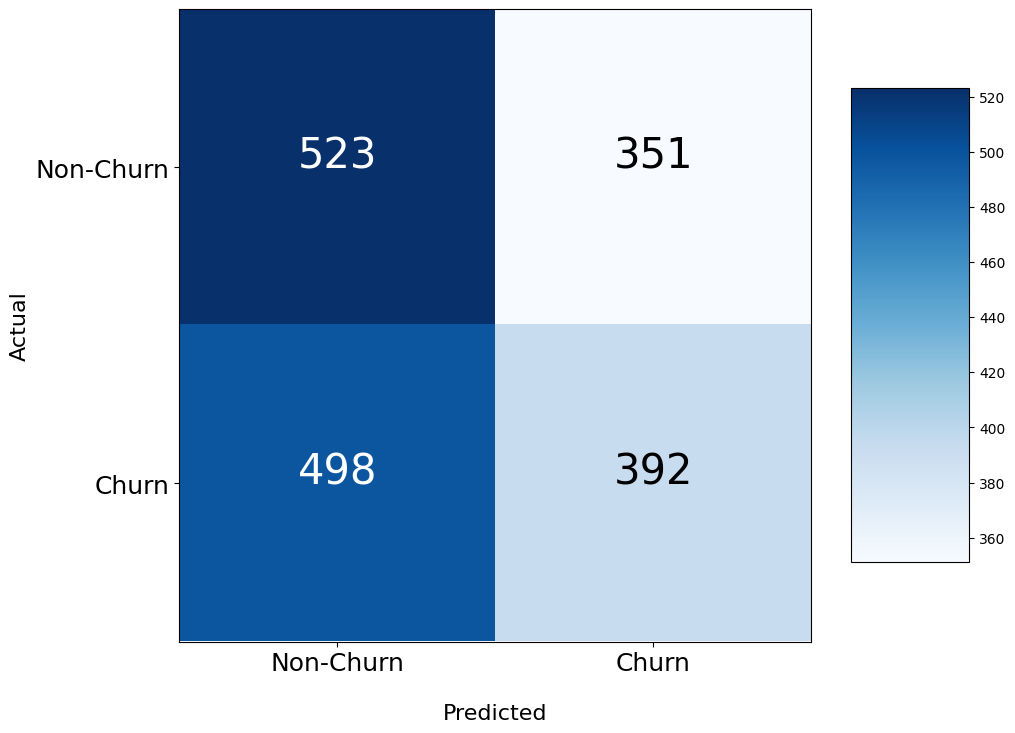

Accuracy: 51.87%


In [ ]:
# Confusion matrix
y_pca_pred = knn_model.predict(x_pca_test)
cm = confusion_matrix(y_pca_test, y_pca_pred)
plot_confusion_matrix(cm)

# Accuracy
accuracy = accuracy_score(y_pca_test, y_pca_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

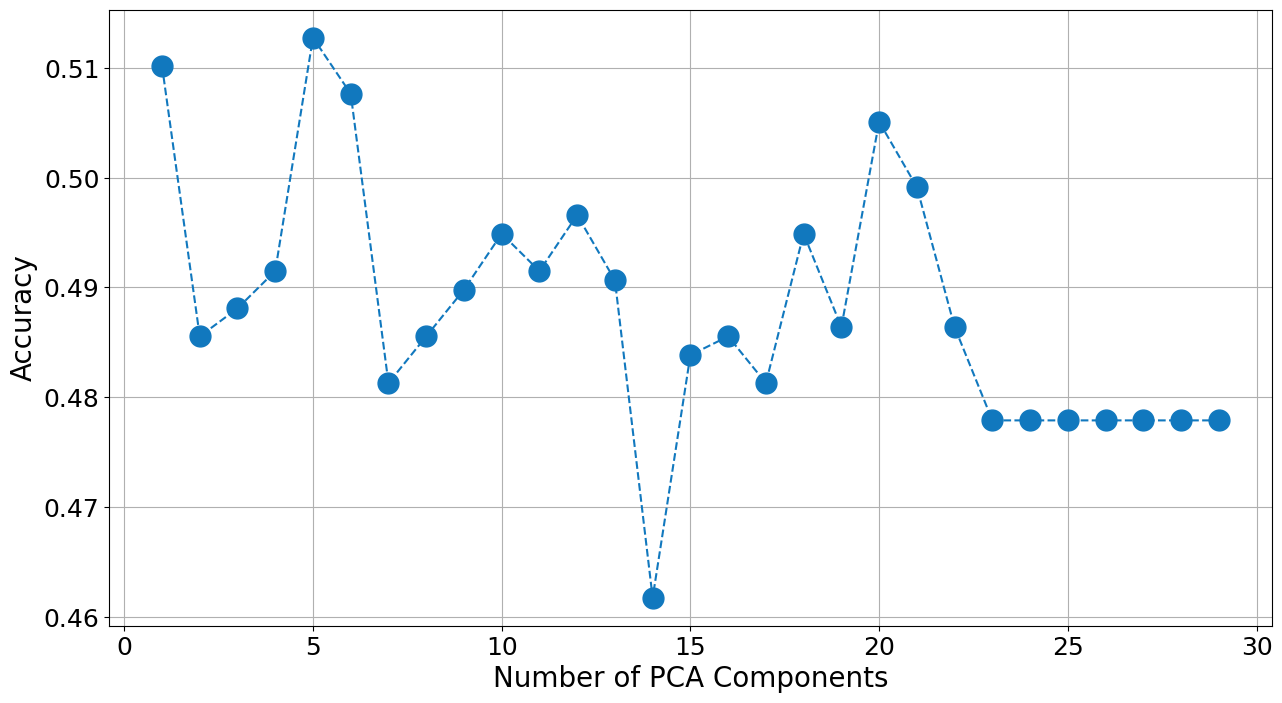

,Position,Accuracy
Max,5,0.512755
Min,14,0.461735


In [ ]:
components = list(range(1, 30))
accuracies = []

# วนลูปลองแต่ละค่า n_components
for n in components:
	pca = PCA(n_components=n)
	X_pca = pca.fit_transform(x)
	
	X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
	
	model = KNeighborsClassifier(n_neighbors=i, weights='distance')
	model.fit(X_train, y_train)
	acc = model.score(X_test, y_test)
	
	accuracies.append(acc)

# วาดกราฟ
plt.figure(figsize=(15, 8))
plt.plot(components, accuracies, color='#1178be', linestyle='dashed', marker='o', markerfacecolor='#1178be', markersize=15)
plt.xlabel('Number of PCA Components', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

accuracy_table = pd.DataFrame({
	'Position': [accuracies.index(max(accuracies)) + 1, accuracies.index(min(accuracies)) + 1],
	'Accuracy': [max(accuracies), min(accuracies)]
}, index=['Max', 'Min'])

accuracy_table

## <font color='#e89c9a'><ul><li>Elbow plot</li></ul></font>

In [ ]:
inertias = []

for i in range(1, 11):
	k_means = KMeans(n_clusters=i, random_state=42)
	k_means.fit(x_test)
	inertias.append(k_means.inertia_)

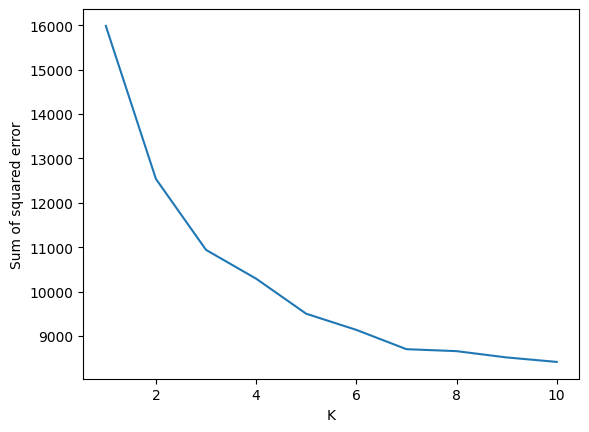

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(range(1, 11), inertias)

In [ ]:
def find_elbow(k_values, y_values):
	p1 = np.array([k_values[0], y_values[0]])
	p2 = np.array([k_values[-1], y_values[-1]])

	distances = []
	for i in range(len(k_values)):
		p = np.array([k_values[i], y_values[i]])
		d = np.abs(np.cross(np.append(p2 - p1, 0), np.append(p1 - p, 0))[-1]) / np.linalg.norm(p2 - p1)
		distances.append(d)

	elbow_index = np.argmax(distances)
	return k_values[elbow_index]

find_elbow(list(range(1, 11)), inertias)

3

# <font color='#3e9dbf'>Decision Tree Classifier</font>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.colors as mcolors

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model = tree_model.fit(x_train, y_train)

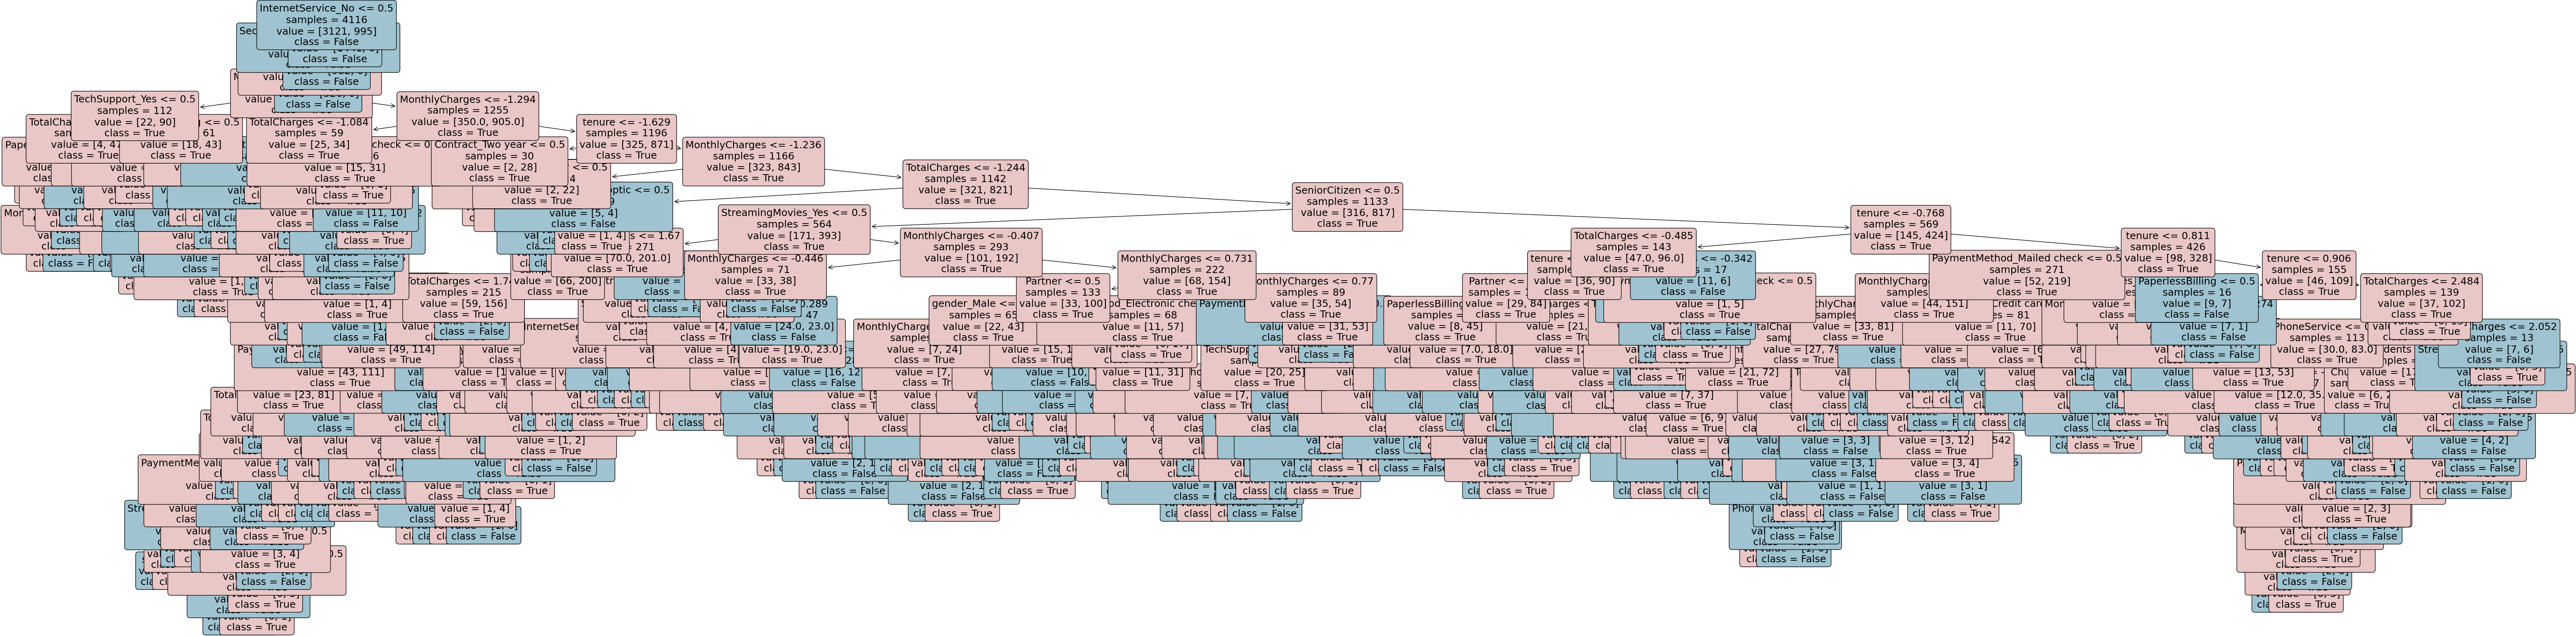

In [ ]:
# กำหนดสีของแต่ละคลาส
class_colors = {
	True: '#e9c7c6',
	False: '#9fc3d0',
}

# สร้าง colormap จากสีของแต่ละคลาส
cmap = mcolors.ListedColormap([class_colors[bool(c)] for c in tree_model.classes_])

plt.figure(figsize=(80, 20))
plot_tree(
	tree_model,
	feature_names=preprocessed_dataset.columns[:-1],
	class_names=[str(c) for c in tree_model.classes_],  # Convert classes to strings
	filled=True,
	rounded=True,
	impurity=False,
	proportion=False,  # แสดงจำนวน samples เป็นค่าจริง
	fontsize=18
)

# ปรับสีของโหนด
ax = plt.gca()
for i, t in enumerate(ax.get_children()):
	if isinstance(t, plt.Text):
		for cls, color in class_colors.items():
			if str(cls) in t.get_text():  # Convert cls to string before using 'in'
				t.set_bbox(dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

plt.show()

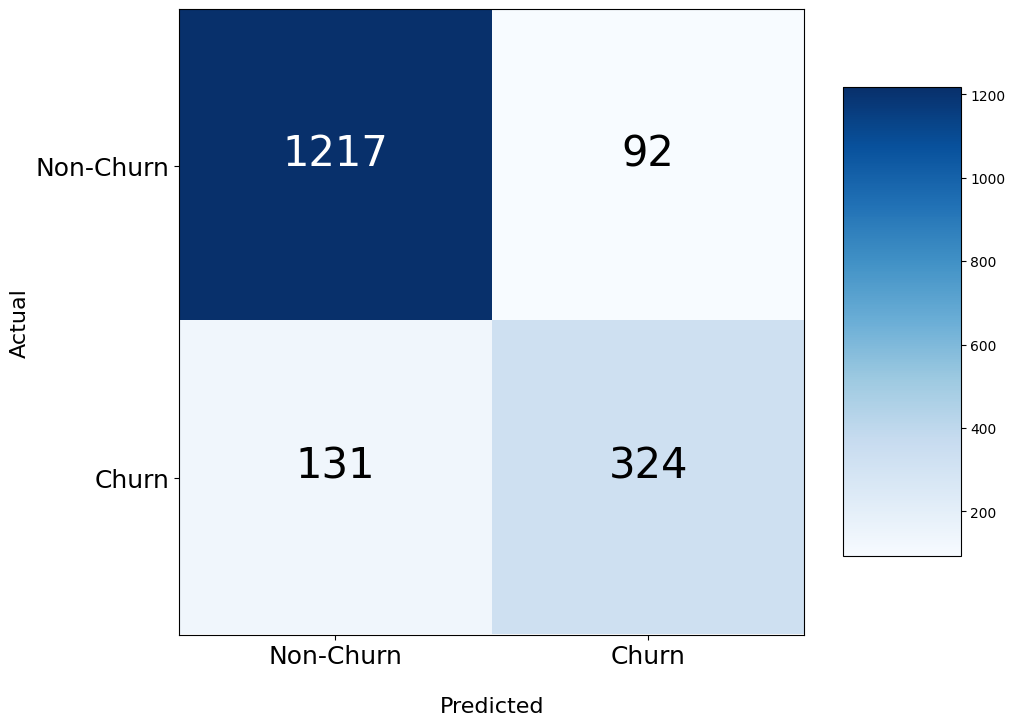

Accuracy: 87.36%


In [ ]:
tree_test_predict = tree_model.predict(x_test)

cm = confusion_matrix(y_test, tree_test_predict)
plot_confusion_matrix(cm)
print(f"Accuracy: {accuracy_score(y_test, tree_test_predict) * 100:.2f}%")

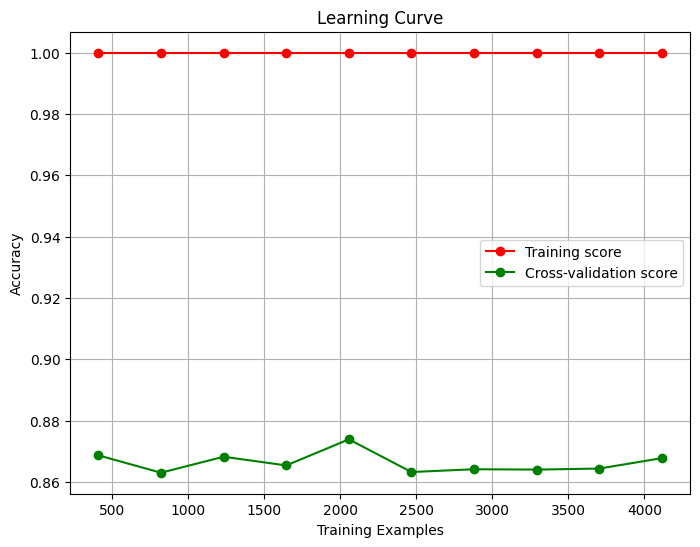

In [ ]:
plot_learning_curve(tree_model, x, y)